<a href="https://colab.research.google.com/github/isaacrossonero/DelishApp/blob/main/wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# read the csv. The csvs are supposed to be comma(,) separated, but instead it is semicolon (;) separated.
# That's why while reading the csv,we used "sep=;"
df = pd.read_csv("/winequality-red.csv", sep=';', index_col=None)

In [8]:
# print the data shape
df.shape

(1599, 12)

In [9]:
# see a sample of the dataset 
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [10]:
# copy the target column to y and remove it from the dataset
y = df['quality']
df.drop(['quality'], axis = 1, inplace=True) 

In [11]:
# Normalize the features to (0,1) range. With this, all the inputs will be in the same scales. 
for col in df.columns: 
  max = df[col].max()
  min = df[col].min()

  OldRange = (max - min)  
  NewRange = (1 - 0)  
  df[col] = (((df[col] - min) * NewRange) / OldRange) + 0

In [12]:
# check if there's any null value
df.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8368ec1430>,
      dtype=object)

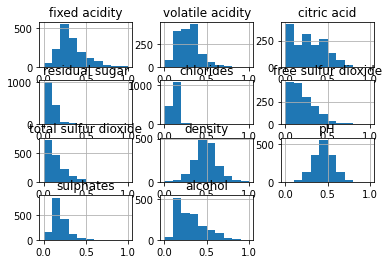

In [13]:
# Let's see the data distributions of each column
df.hist()

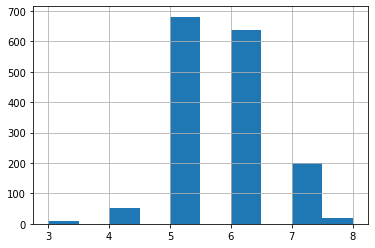

In [14]:
# Data distribution of target
y.hist()

In [15]:
# check the target size
y.shape

(1599,)

In [16]:
# check the unique values of y
y.unique()

array([5, 6, 7, 4, 8, 3])

As can be seen here, 0, 1, 2, 9 and 10 are missing here. I will add these 5 values at the end of y. Then I will do one hot encoding on y. This will do one hot encoding for 11 values (0 to 10). After one hot encoding is done, I will remove the last 5 values I added and it will leave the y as original shape.


In [17]:
# add missing valuesat the end of y
y.loc[len(y.index)] = 0
y.loc[len(y.index)] = 1 
y.loc[len(y.index)] = 2 
y.loc[len(y.index)] = 9 
y.loc[len(y.index)] = 10 


In [18]:
# lets check the unique values again
y.unique()

array([ 5,  6,  7,  4,  8,  3,  0,  1,  2,  9, 10])

In [19]:
# one hot encoding
y= pd.get_dummies(y)

In [20]:
# let'scheck if target is one hot encoded correctly
y

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1599,1,0,0,0,0,0,0,0,0,0,0
1600,0,1,0,0,0,0,0,0,0,0,0
1601,0,0,1,0,0,0,0,0,0,0,0
1602,0,0,0,0,0,0,0,0,0,1,0


In [21]:
# remove the  last 5 values that we added
y = y.iloc[:-5]

In [22]:
# let's check shape of y and see if it matches the previous length
y.shape

(1599, 11)

In [23]:
# let's check y for one last time
y

,0,1,2,3,4,5,6,7,8,9,10
0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,0,0,0,0,0,1,0,0,0,0,0
1595,0,0,0,0,0,0,1,0,0,0,0
1596,0,0,0,0,0,0,1,0,0,0,0
1597,0,0,0,0,0,1,0,0,0,0,0


In [24]:
# import necessary keras libraries 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(123)

In [25]:
# do 80/20 train-test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [26]:
# Create the network
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=[11]))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(11, activation='softmax'))

In [27]:
# set optimizers and compile the model
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics =['categorical_accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 32)                544       
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 11)                1

In [28]:
# train the model
BATCH_SIZE = 16
EPOCHS = 1000


history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Epoch 1/1000
80/80 - 1s - loss: 2.3203 - categorical_accuracy: 0.1986 - val_loss: 2.1507 - val_categorical_accuracy: 0.4062 - 1s/epoch - 14ms/step
Epoch 2/1000
80/80 - 0s - loss: 2.0375 - categorical_accuracy: 0.3417 - val_loss: 1.7331 - val_categorical_accuracy: 0.4062 - 139ms/epoch - 2ms/step
Epoch 3/1000
80/80 - 0s - loss: 1.9164 - categorical_accuracy: 0.3589 - val_loss: 1.6165 - val_categorical_accuracy: 0.4062 - 151ms/epoch - 2ms/step
Epoch 4/1000
80/80 - 0s - loss: 1.8136 - categorical_accuracy: 0.3479 - val_loss: 1.5127 - val_categorical_accuracy: 0.4062 - 128ms/epoch - 2ms/step
Epoch 5/1000
80/80 - 0s - loss: 1.7473 - categorical_accuracy: 0.3464 - val_loss: 1.3926 - val_categorical_accuracy: 0.4062 - 155ms/epoch - 2ms/step
Epoch 6/1000
80/80 - 0s - loss: 1.6901 - categorical_accuracy: 0.3706 - val_loss: 1.3640 - val_categorical_accuracy: 0.4062 - 149ms/epoch - 2ms/step
Epoch 7/1000
80/80 - 0s - loss: 1.5990 - categorical_accuracy: 0.3581 - val_loss: 1.3072 - val_categorical_a

In [29]:
training_acc = history.history['categorical_accuracy'][-1]
test_acc = history.history['val_categorical_accuracy'][-1]

In [30]:
print("After 1000 epochs:\n, \tTraining accuracy is %.2f \n\tTesting accuracy is %.2f"%(training_acc,test_acc))

After 1000 epochs:
, 	Training accuracy is 0.65 
	Testing accuracy is 0.58


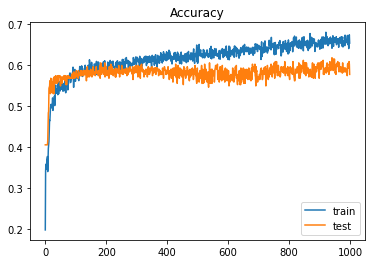

In [31]:
# epoch vs accuracy graph

plt.title('Accuracy')
plt.plot(history.history['categorical_accuracy'], label='train')
plt.plot(history.history['val_categorical_accuracy'], label='test')
plt.legend()


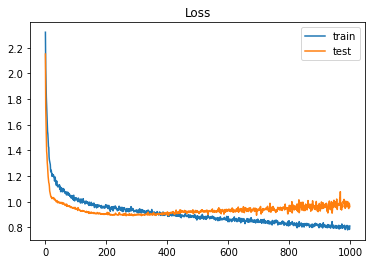

In [32]:
# epoch vs loss graph
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
